In [1]:
import networkx as nx
from io import BytesIO
import pandas as pd


In [2]:
tw = '/Users/maddie/Downloads/DOMESTICTERRORWEB.csv'
open(tw).readlines()[:15]

['\ufeff"",14words.com,americanpatrol.org,amprom.org,anti-semitism.net,arayannationsknights.com,aryan-nations.org,aryannationsknights.com,christianseparatis.org,circ.net,cofcc.org,creator.org,crownrights.com,crusader.net,dixienet.org,dixierising.com,folkandfaith.com,georgiacsa.org,godhatesfgs.com,kingidentity.com,kinsmanredeemer.com,kkkk.net,natall.com,natallar.com,nationalist.org,palmetto.org,resist.com,seek-info.com,southerncaucus.org,southernmessenger.org,southernsentinel.tripod.com,stormfront.org,texasis.org\n',
 '14words.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0\n',
 'americanpatrol.org,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1\n',
 'amprom.org,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0\n',
 'anti-semitism.net,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0\n',
 'arayannationsknights.com,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\n',
 'aryan-nations.org,0,0,0,0,1,0,0,0,0,0,0,0

In [3]:
df = pd.read_csv(tw)
df

,Unnamed: 0,14words.com,americanpatrol.org,amprom.org,anti-semitism.net,arayannationsknights.com,aryan-nations.org,aryannationsknights.com,christianseparatis.org,circ.net,...,natallar.com,nationalist.org,palmetto.org,resist.com,seek-info.com,southerncaucus.org,southernmessenger.org,southernsentinel.tripod.com,stormfront.org,texasis.org
0,14words.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,americanpatrol.org,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,amprom.org,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,anti-semitism.net,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,arayannationsknights.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,aryan-nations.org,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,aryannationsknights.com,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,christianseparatis.org,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,circ.net,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,cofcc.org,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Transforming dataframe into usable format- source and target columns.

In [4]:
newdf = (df.replace(0, pd.NA).set_index('Unnamed: 0').stack().rename_axis(['Source', 'Target']).reset_index().drop(columns=0))

In [5]:
newdf

,Source,Target
0,14words.com,stormfront.org
1,americanpatrol.org,cofcc.org
2,americanpatrol.org,texasis.org
3,amprom.org,seek-info.com
4,anti-semitism.net,crusader.net
...,...,...
84,stormfront.org,nationalist.org
85,stormfront.org,resist.com
86,texasis.org,americanpatrol.org
87,texasis.org,dixienet.org


In [6]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(newdf, 'Source', 'Target',  create_using=Graphtype)

In [7]:
print(G)

Graph with 32 nodes and 50 edges


In [8]:
nx.average_clustering(G)

0.2864335317460318

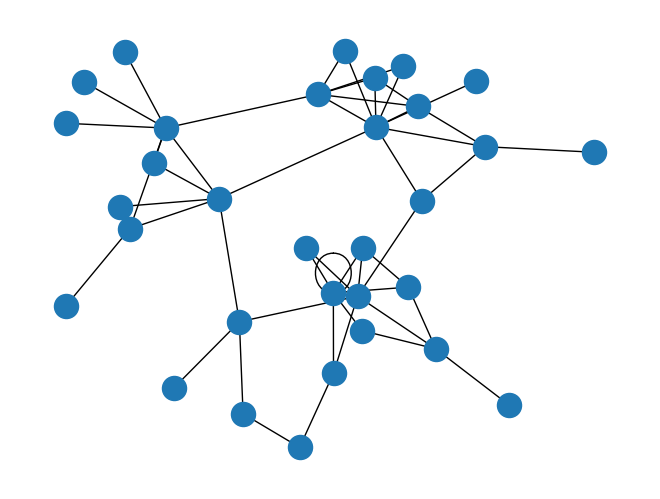

In [9]:
nx.draw(G)

### Betweenness Centrality - dixienet.org acts as a connection between sites most frequently.

In [10]:
bc1 = nx.betweenness_centrality(G)
bc1

{'14words.com': 0.0,
 'stormfront.org': 0.3089605734767025,
 'americanpatrol.org': 0.004480286738351254,
 'cofcc.org': 0.03118279569892473,
 'texasis.org': 0.03351254480286738,
 'amprom.org': 0.0,
 'seek-info.com': 0.32132616487455196,
 'anti-semitism.net': 0.01003584229390681,
 'crusader.net': 0.07706093189964157,
 'natall.com': 0.07598566308243726,
 'resist.com': 0.0,
 'aryan-nations.org': 0.21469534050179215,
 'arayannationsknights.com': 0.0,
 'folkandfaith.com': 0.06451612903225806,
 'kingidentity.com': 0.0,
 'kkkk.net': 0.0,
 'aryannationsknights.com': 0.0,
 'kinsmanredeemer.com': 0.38530465949820786,
 'christianseparatis.org': 0.0,
 'circ.net': 0.1924731182795699,
 'dixienet.org': 0.42275985663082444,
 'crownrights.com': 0.0,
 'southernsentinel.tripod.com': 0.10627240143369172,
 'creator.org': 0.0,
 'nationalist.org': 0.0,
 'georgiacsa.org': 0.016308243727598565,
 'palmetto.org': 0.0,
 'southerncaucus.org': 0.06344086021505375,
 'dixierising.com': 0.0014336917562724014,
 'souther

### Degree Centrality - Stormfront.org is connected to the highest number of other sites

In [11]:
dc1 = nx.degree_centrality(G)
dc1

{'14words.com': 0.03225806451612903,
 'stormfront.org': 0.29032258064516125,
 'americanpatrol.org': 0.06451612903225806,
 'cofcc.org': 0.06451612903225806,
 'texasis.org': 0.0967741935483871,
 'amprom.org': 0.03225806451612903,
 'seek-info.com': 0.12903225806451613,
 'anti-semitism.net': 0.12903225806451613,
 'crusader.net': 0.1935483870967742,
 'natall.com': 0.12903225806451613,
 'resist.com': 0.0967741935483871,
 'aryan-nations.org': 0.22580645161290322,
 'arayannationsknights.com': 0.03225806451612903,
 'folkandfaith.com': 0.0967741935483871,
 'kingidentity.com': 0.03225806451612903,
 'kkkk.net': 0.03225806451612903,
 'aryannationsknights.com': 0.06451612903225806,
 'kinsmanredeemer.com': 0.1935483870967742,
 'christianseparatis.org': 0.03225806451612903,
 'circ.net': 0.0967741935483871,
 'dixienet.org': 0.22580645161290322,
 'crownrights.com': 0.03225806451612903,
 'southernsentinel.tripod.com': 0.12903225806451613,
 'creator.org': 0.06451612903225806,
 'nationalist.org': 0.0645161

### Eigenvector Centrality - Stormfront.org appears to be the most influential, followed by crusader.net

In [12]:
ec1 = nx.eigenvector_centrality(G, max_iter = 500)
ec1

{'14words.com': 0.10919373769802669,
 'stormfront.org': 0.48317643116397635,
 'americanpatrol.org': 0.027170904960959606,
 'cofcc.org': 0.03141917226628165,
 'texasis.org': 0.08880742393383488,
 'amprom.org': 0.02527860443168985,
 'seek-info.com': 0.11185510828734281,
 'anti-semitism.net': 0.307752660914972,
 'crusader.net': 0.37721852049852445,
 'natall.com': 0.2374031167158463,
 'resist.com': 0.2639912584315286,
 'aryan-nations.org': 0.22536842968191106,
 'arayannationsknights.com': 0.05093131172249475,
 'folkandfaith.com': 0.11265658511321923,
 'kingidentity.com': 0.05093131172249475,
 'kkkk.net': 0.05093131172249475,
 'aryannationsknights.com': 0.10690297506950273,
 'kinsmanredeemer.com': 0.24767136203945908,
 'christianseparatis.org': 0.02545942363612877,
 'circ.net': 0.20591488989373496,
 'dixienet.org': 0.19057804359892688,
 'crownrights.com': 0.01764527897891588,
 'southernsentinel.tripod.com': 0.07807701068975484,
 'creator.org': 0.1944418292020764,
 'nationalist.org': 0.19444

I don't find this graphic particularly useful. I am creating a visual in Gephi!

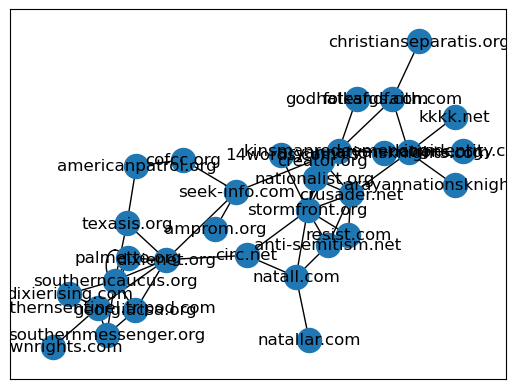

In [13]:
nx.spring_layout(G)
nx.draw_networkx(G)

### Removing dixienet.org to see the effect. I am choosing dixienet.org because of its high betweenness centrality but low(er) degree centrality and eigenvector centrality. 

Finding which rows contain dixienet.org and then dropping them from dataframe.

In [14]:
newdf.loc[newdf['Source'] == 'dixienet.org']

,Source,Target
28,dixienet.org,circ.net
29,dixienet.org,georgiacsa.org
30,dixienet.org,palmetto.org
31,dixienet.org,seek-info.com
32,dixienet.org,southerncaucus.org
33,dixienet.org,southernsentinel.tripod.com
34,dixienet.org,texasis.org


In [15]:
newdf2 = newdf.drop(labels=[28,29,30,31,32,33,34], axis=0, index=None, inplace=False, errors='raise')

Dropping rows where dixienet.org is a "target"

In [16]:
newdf2.loc[newdf2['Target'] == 'dixienet.org']

,Source,Target
16,circ.net,dixienet.org
40,georgiacsa.org,dixienet.org
58,palmetto.org,dixienet.org
65,seek-info.com,dixienet.org
67,southerncaucus.org,dixienet.org
87,texasis.org,dixienet.org


In [17]:
newdf3 = newdf2.drop(labels=[16,40,58,65,67,87], axis=0, index=None, inplace=False, errors='raise')

In [18]:
newdf3

,Source,Target
0,14words.com,stormfront.org
1,americanpatrol.org,cofcc.org
2,americanpatrol.org,texasis.org
3,amprom.org,seek-info.com
4,anti-semitism.net,crusader.net
...,...,...
83,stormfront.org,natall.com
84,stormfront.org,nationalist.org
85,stormfront.org,resist.com
86,texasis.org,americanpatrol.org


In [19]:
G2 = nx.from_pandas_edgelist(newdf3, 'Source', 'Target',  create_using=Graphtype)

In [20]:
bc2 = nx.betweenness_centrality(G2)
dc2 = nx.betweenness_centrality(G2)
ec2 = nx.eigenvector_centrality(G2, max_iter = 500)


In [21]:
newdf3 = pd.DataFrame([bc1, bc2]).T.rename(columns={0:'BC1',1:'BC2'})
newdf3

,BC1,BC2
14words.com,0.000000,0.000000
stormfront.org,0.308961,0.393870
americanpatrol.org,0.004480,0.404598
cofcc.org,0.031183,0.434483
texasis.org,0.033513,0.370115
amprom.org,0.000000,0.000000
seek-info.com,0.321326,0.503448
anti-semitism.net,0.010036,0.010728
crusader.net,0.077061,0.082375
natall.com,0.075986,0.067816


In [22]:
newdf3['BC CHANGE'] = ''

In [23]:
def change(BC2,BC1):
    return (BC2 - BC1)

In [24]:
newdf3['BC CHANGE'] = change(newdf3['BC2'], newdf3['BC1'])

In [47]:
newdf3['DC1'] = dc1
newdf3['DC2'] = dc2
newdf3['DC CHANGE'] = change(newdf3['DC2'], newdf3['DC1'])
newdf3['EC1'] = ec1
newdf3['EC2'] = ec2
newdf3['EC CHANGE'] = change(newdf3['EC2'], newdf3['EC1'])

dfnodixie = newdf3
dfnodixie

,BC1,BC2,BC CHANGE,DC1,DC2,DC CHANGE,EC1,EC2,EC CHANGE
14words.com,0.000000,0.000000,0.000000,0.032258,0.000000,-0.032258,0.109194,0.117687,0.008493
stormfront.org,0.308961,0.393870,0.084909,0.290323,0.393870,0.103547,0.483176,0.515012,0.031836
americanpatrol.org,0.004480,0.404598,0.400117,0.064516,0.404598,0.340082,0.027171,0.003844,-0.023327
cofcc.org,0.031183,0.434483,0.403300,0.064516,0.434483,0.369967,0.031419,0.015836,-0.015583
texasis.org,0.033513,0.370115,0.336602,0.096774,0.370115,0.273341,0.088807,0.000984,-0.087823
amprom.org,0.000000,0.000000,0.000000,0.032258,0.000000,-0.032258,0.025279,0.014957,-0.010321
seek-info.com,0.321326,0.503448,0.182122,0.129032,0.503448,0.374416,0.111855,0.065454,-0.046401
anti-semitism.net,0.010036,0.010728,0.000692,0.129032,0.010728,-0.118304,0.307753,0.334315,0.026563
crusader.net,0.077061,0.082375,0.005315,0.193548,0.082375,-0.111173,0.377219,0.412832,0.035614
natall.com,0.075986,0.067816,-0.008170,0.129032,0.067816,-0.061216,0.237403,0.246744,0.009341


### Next removing Stormfront.org to see the effect. Following the same steps as for dixienet.org

In [26]:
rows = newdf.loc[newdf['Source'] == 'stormfront.org']
rows = rows.index.to_list()
rows

[77, 78, 79, 80, 81, 82, 83, 84, 85]

In [27]:
newdf4 = newdf.drop(labels= rows, axis=0, index=None, inplace=False, errors='raise')

In [28]:
newdf4

,Source,Target
0,14words.com,stormfront.org
1,americanpatrol.org,cofcc.org
2,americanpatrol.org,texasis.org
3,amprom.org,seek-info.com
4,anti-semitism.net,crusader.net
...,...,...
75,southernmessenger.org,southerncaucus.org
76,southernmessenger.org,southernsentinel.tripod.com
86,texasis.org,americanpatrol.org
87,texasis.org,dixienet.org


In [29]:
rows2 = newdf.loc[newdf['Target'] == 'stormfront.org']
rows2 = rows2.index.to_list()
rows2

[0, 7, 18, 27, 54, 57, 62]

In [30]:
newdf4 = newdf4.drop(labels= rows2, axis=0, index=None, inplace=False, errors='raise')
newdf4

,Source,Target
1,americanpatrol.org,cofcc.org
2,americanpatrol.org,texasis.org
3,amprom.org,seek-info.com
4,anti-semitism.net,crusader.net
5,anti-semitism.net,natall.com
...,...,...
75,southernmessenger.org,southerncaucus.org
76,southernmessenger.org,southernsentinel.tripod.com
86,texasis.org,americanpatrol.org
87,texasis.org,dixienet.org


In [31]:
G3 = nx.from_pandas_edgelist(newdf4, 'Source', 'Target',  create_using=Graphtype)
print(G3)

Graph with 30 nodes and 41 edges


In [33]:
bc3 = nx.betweenness_centrality(G3)
dc3 = nx.betweenness_centrality(G3)
ec3 = nx.eigenvector_centrality(G3, max_iter = 500)

In [34]:
newdf5 = pd.DataFrame([bc1, bc3]).T.rename(columns={0:'BC1',1:'BC3'})
newdf5

,BC1,BC3
14words.com,0.000000,NaN
stormfront.org,0.308961,NaN
americanpatrol.org,0.004480,0.005131
cofcc.org,0.031183,0.035714
texasis.org,0.033513,0.033456
amprom.org,0.000000,0.000000
seek-info.com,0.321326,0.413588
anti-semitism.net,0.010036,0.130542
crusader.net,0.077061,0.236453
natall.com,0.075986,0.171182


In [42]:
newdf5['BC CHANGE'] = change(newdf5['BC3'], newdf5['BC1'])
newdf5['DC1'] = dc1
newdf5['DC3'] = dc3
newdf5['DC CHANGE'] = change(newdf5['DC3'], newdf5['DC1'])
newdf5['EC1'] = ec1
newdf5['EC3'] = ec3
newdf5['EC CHANGE'] = change(newdf5['EC3'], newdf5['EC1'])

dfnostorm = newdf5


# Final dataframes with each centrality measure and the change after removing sites.

In [45]:
dfnodixie #results freom removing dixienet.org

,BC1,BC2,BC CHANGE,DC1,DC2,DC CHANGE,EC1,EC2,EC CHANGE
14words.com,0.000000,0.000000,0.000000,0.032258,0.000000,-0.032258,0.109194,0.117687,0.008493
stormfront.org,0.308961,0.393870,0.084909,0.290323,0.393870,0.103547,0.483176,0.515012,0.031836
americanpatrol.org,0.004480,0.404598,0.400117,0.064516,0.404598,0.340082,0.027171,0.003844,-0.023327
cofcc.org,0.031183,0.434483,0.403300,0.064516,0.434483,0.369967,0.031419,0.015836,-0.015583
texasis.org,0.033513,0.370115,0.336602,0.096774,0.370115,0.273341,0.088807,0.000984,-0.087823
amprom.org,0.000000,0.000000,0.000000,0.032258,0.000000,-0.032258,0.025279,0.014957,-0.010321
seek-info.com,0.321326,0.503448,0.182122,0.129032,0.503448,0.374416,0.111855,0.065454,-0.046401
anti-semitism.net,0.010036,0.010728,0.000692,0.129032,0.010728,-0.118304,0.307753,0.334315,0.026563
crusader.net,0.077061,0.082375,0.005315,0.193548,0.082375,-0.111173,0.377219,0.412832,0.035614
natall.com,0.075986,0.067816,-0.008170,0.129032,0.067816,-0.061216,0.237403,0.246744,0.009341


In [46]:
dfnostorm #results from removing stormfront.org

,BC1,BC3,BC CHANGE,DC1,DC3,DC CHANGE,EC1,EC3,EC CHANGE
14words.com,0.000000,NaN,NaN,0.032258,NaN,NaN,0.109194,NaN,NaN
stormfront.org,0.308961,NaN,NaN,0.290323,NaN,NaN,0.483176,NaN,NaN
americanpatrol.org,0.004480,0.005131,0.000651,0.064516,0.005131,-0.059385,0.027171,0.078713,0.051543
cofcc.org,0.031183,0.035714,0.004531,0.064516,0.035714,-0.028802,0.031419,0.055387,0.023968
texasis.org,0.033513,0.033456,-0.000056,0.096774,0.033456,-0.063318,0.088807,0.269008,0.180200
amprom.org,0.000000,0.000000,0.000000,0.032258,0.000000,-0.032258,0.025279,0.036287,0.011009
seek-info.com,0.321326,0.413588,0.092262,0.129032,0.413588,0.284556,0.111855,0.149547,0.037691
anti-semitism.net,0.010036,0.130542,0.120506,0.129032,0.130542,0.001510,0.307753,0.014150,-0.293602
crusader.net,0.077061,0.236453,0.159392,0.193548,0.236453,0.042905,0.377219,0.016117,-0.361102
natall.com,0.075986,0.171182,0.095197,0.129032,0.171182,0.042150,0.237403,0.034850,-0.202553
